# EXAMEN FINAL DE FUNDAMENTOS DE MACROECONOMÍA:

Alumna: Angela Rodríguez Fernández
Código: 20200748

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
%matplotlib inline
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
import plotnine as p

In [2]:
from causalgraphicalmodels import CausalGraphicalModel
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
#import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import pyreadr

In [3]:
from linearmodels.iv import IV2SLS

## Parte Teórica

## 1. (4 puntos) Instrumental Variables (IV)
Suponga que estamos interesados en estudiar la relación entre educación(X) y el nivel de ingresos(Y). 
Un investigador propone utilizar como variable instrumental(Z) el numero de horas que una persona utilizó para ver televisión cuando era niño. 


- ¿Es válido este instrumento? Por qué? Explique todos los supuestos que deben cumplirse. 

Las variables instrumentales son aquellas que no pertenecen a la ecuación explicativa, condicionan a otras variables y se correlacionan con las variables endógenas. En este sentido, las utilizamos cuando queremos evitar sesgos y queremos identificar limpiamente el efecto causal de una variable sobre otra (evitar tomar en cuenta variables no observables). Lo que buscamos en que mediante la variable instrumental Z podamos hallar una relación causal entre educación y el nivel de ingresos. Pero, ¿es viable y válido el instrumento elegido?  Para que una variables sea válida debe cumplir dos supuestos: relevancia y validez. Con la relevancia se refiere a que el instrumento debe estar altamente correlacionado con la variable endógena, mientras mayor sea la correlación entre Z con la variable educación, mayor confianza se puede tener en el concepto de relevancia. En el caso planteado, se puede afirmar que se cumple con el supuesto ya que dependiendo de cuánto tiempo una persona vio la televisión de niño se puede correlacionar con el tiempo que le dedicó a sus estudios. Con la validez nos referimos a que el instrumento no tiene que ser afectado por la variable directamente ni correlacionado con la variable de error (variables no observables), cerrando así posibles backdoors hacia el instrumento. En este caso,  el número de horas que una persona utilizó para ver televisión cuando era niño no está directamente correlacionada con  la variable nivel de ingresos (Y), ni tampoco parece estar correlacionada con alguna variable omitida o no observable que se correlacione con la educación y nivel de ingreso a través de la variable instrumental escogida. Así se evita el problema de la endogeneidad y más bien se cumple con la exogeneidad que nos señala que nuestra variable instrumental no está correlacionado con un error que causaría el problema de sesgo por variables omitidas. 


- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones

Lo que buscamos es que Z →  X →  Y, y que este procedimiento se realice de manera que no haya variables omitidas ni sesgos para poder identificar limpiamente el efecto causal de X sobre Y.  En este caso, el número de horas que una persona utilizó para ver televisión cuando era niño funciona como variable instrumental que permite hallar la relación causal entre educación → nivel de ingresos. Como sabemos que se cumplen los dos supuestos, se puede afirmar que Z →  X debido a la correlación entre ambos y que no hay Z →  Y al menos que sea de manera indirecta mediante X. Asimismo, se afirma que no hay ninguna conexión con U (error o variable omitida) que afecte a Z o X o Y . 
En este caso, tomando en cuenta que si se cumplen los supuestos necesarios para utilizar la variable instrumental, si podríamos aplicarla y así ver una relación causal entre educación y nivel de ingresos. 


- Puede concluir que al correr una regresión los resultados muestran relaciones causales o solamente de correlación? 

En sí mismo, los diseños de variables instrumentales son distintos a los de un modelo de regresión ya que estos si emplean una asignación aleatoria, logran solucionar el problema de endogeneidad y evitan el sesgo por variables no observables. En este caso, tomando en cuenta que si se cumplen los supuestos necesarios para utilizar la variable instrumental, “el número de horas que una persona utilizó para ver televisión cuando era niño”, si podríamos aplicar la variable instrumental y así ver una relación causal entre educación y nivel de ingresos. 



## 2. (4 puntos) Regression Discontinuity Design (RDD)
Supongamos que estamos estudiando la eficacia de un programa de becas creado por el gobierno Peruano sobre las notas de los alumnos al final del primer semestre en la universidad. PRONABEC ha decidido que entregará becas a aquellos postulantes que tengan un promedio superior durante la secundaria igual a 16 . 

- Indetifique todos los elementos necesarios para implementar un RDD en este ejemplo. 

La regresión discontinua (RDD) es un diseño cuasi-experimental que nos permite poder realizar inferencias causales en ausencia de la aleatorización al determinar los efectos causales de intervenciones mediante la asignación de un punto de corte/umbral por encima o por debajo del asignado. En este caso, se analiza la entrega de becas a estudiantes a través de la asignación de un valor de corte, que sería la condición de tener un promedio superior durante la secundaria igual a 16 que es establecida por PRONABEC. 

En este caso, la variable de ejecución es la variable que determina si un estudiante recibirá la beca o no en base a su promedio durante secundaria. El punto de corte nos señala el límite de la variable donde se determina si se recibe la beca o no. Si tienen un promedio igual o superior a 16 son candidatos para recibir la beca, si su promedio es inferior no son tomados en cuenta. Y el ancho de la banda es la cantidad de área alrededor del límite que se desea considerar comparable. Se podría pensar que los estudiantes con promedios cercanos a 16 son similares, pero va depender de qué tan lejos estén ya que, por ejemplo, personas que se encuentren más lejos del promedio asignado pueden ser diferentes/puede haber mayor variación por razones distintas al punto de corte. 

Del mismo modo, es sumamente importante la continuidad de la variable de ejecución, la cuál se cumple en este caso, ya que toda discontinuidad implica necesariamente alguna causa. Así como que la regla de asignación del punto de corte sea objetiva y no sea manipulada, lo cuál se cumple ya que fue propuesta por la PRONABEC con tiempo. 


- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

El efecto de tratamiento del RDD que nos permitirá encontrar el efecto causal se dará en tanto cuanto varía el valor determinado en función de nuestro punto de corte, es decir, cuanto cambia  el otorgamiento de becas en función del promedio. Por ejemplo, el otorgamiento de becas para estudiantes postulantes se eleva cuando tienen un promedio durante la secundaria igual o superior a 16. Tendríamos dos grupos, el grupo de tratamiento son aquellos que cumplen con la condición,  y aquellos que no cumplen con la condición. Se estima el efecto del tratamiento restando la media del grupo de tratamiento con la media del grupo de control. De este ejercicio se puede encontrar el efecto causal. 


- Por qué decimos que un RDD es  lo más parecido a un Experimento Aleatorio? 

Decimos esto porque puede ser casi tan bueno como un experimetno aleatorio en tanto puede producir una estimación no sesgada del efecto del tratamiento a pesar de no aplicar el elemento de aleatorización. Es decir, a pesar de que los grupos son definidos de manera 'objetiva' o bajo ciertos parámetros, lo cuál es muy diferente a los experimientos aleatorios que escogen a sus grupos de manera aleatoria, aun así el RDD es capaz de dar resultados y estimaciones no sesgadas e incluso es capaz de estimar el 'local' del efecto del tratamiento de manera en la que la aleatorización no puede. 

## 3. (4 puntos) Difference in Difference (DiD)
Supongamos que estamos interesados ​​en estudiar el impacto de la migración en la tasa de empleo en dos regiones del Perú en 2017-2018. Tenemos datos anuales sobre la tasa de empleo en Lima, que experimentó una afluencia significativa de inmigrantes en 2018,  y Puno que no experimentó el ingreso de migrantes (2017 ninguna de las regiones experimentó afluencia de migrantes). Podemos usar un análisis DID para comparar el cambio en las tasas de empleo entre las dos regiones a lo largo del tiempo para ver si la migración tuvo algún efecto.

- Indetifique todos los elementos necesarios para implementar un DiD en este ejemplo. 

El método de diferencias en diferencias (Dif-Dif) es un método de identificación cuasi-experimental temprana para estimar efectos causales entre dos periodos de tiempo de dos grupos (uno de tratamiento y otro de control), permitiéndonos comparar los cambios en el tiempo en la variable de interés, en este caso sería el impacto de la migración en la tasa de empleo, incluso cuando no es posible aleatorizar. Lo importante de este método es la variable tiempo ya que tendrá un efecto sobre el mismo tratamiento y el outcome final, y eso justamente lo que nos están preguntando en este caso al querer ver el cambio en las tasas de empleo entre las dos regiones a lo largo del tiempo para ver si la migración tuvo algún efecto. Un fundamento principal del Dif-Dif que debe cumplirse para aplicarlo sobre este caso es que la evolución de la tendencia previa del outcome principal en el grupo de tratamiento, Lima que experimentó una afluencia de inmigrante en 2018, y el grupo de control, Puno que no experimentó una afluencia de inmigrantes en 2018, sean paralelos. En este caso si se cumple ya que previo a 2018, en el 2017 ambas regiones no experimentaron influencia de inmigrantes. En este sentido, si se podría aplicar el Dif-Dif ya que buscamos comparar los cambios en el tiempo en la tasa de empleo a partir de la presencia de afluencia de inmigrantes o no en dos períodos distintos, y en dos regiones distintas. 


- Explique el procedimiento para encontrar el efecto causal en este escenario. Puede utilizar ecuaciones.

En este caso, tendríamos que hacer un doble resta y comparación: (Lima 2018 - Lima 2017) - (Puno 2018 - Puno 2017), y así comparar qué sucedió cuando sí hubo afluencia de inmigrantes y cuando no hubo, y si hubo algún efecto luego en la tasa de empleo. Como vemos, no analizamos tan sólo un grupo por separado, sino que los analizamos en conjunto y los restamos para contrastar. En este marco, el verdadero efecto causal no es solo comparar a los mismo grupos con su ‘yo’ anterior, sino tomar la diferencia de la variación entre el grupo de tratamiento (Lima) y el grupo de control (Puno), y así sacar un promedio de los efectos sobre ambos grupos. 


## 4. (4 puntos) Lecturas
- [Bell, A., Chetty, R., Jaravel, X., Petkova, N., & Van Reenen, J. (2019). Who becomes an inventor in America? The importance of exposure to innovation. The Quarterly Journal of Economics, 134(2), 647-713.](https://www.nber.org/system/files/working_papers/w24062/w24062.pdf),  ¿Cuáles son las debilidades del enfoque del paper para responder su pregunta de investigación?

Primero, si bien los resultados del paper reflejan la capacidad de los niños para innovar en edades tempranas, esta capacidad podría aún representar una parte esencial de las brechas de innovación. Es decir, una debilidad del paper es que los resultados no brindan evidencias lo suficientemente concluyentes sobre el factor del entorno ya que los puntajes de las pruebas son una medida imperfecta de la capacidad. Segundo, y continuando con las consideraciones respecto a la innovación, podría considerarse como una debilidad la falta de nuevas variables que podrían influir en el resultado del efecto causal como el acceso al internet y tecnología. Estos factores nuevos podrían tener un impacto significativo y quizás podrían ser más significativos que los encontrados por el propio autor. Tercero, el estudio no toma en cuenta factores intelectuales para evidenciar la propensión de uno para volverse inventor, dándole mayor énfasis a factores estructurales sin tomar en cuenta el nivel y rendimiento educativo. 


- [Dell, M. (2010). The persistent effects of Peru's mining mita. Econometrica, 78(6), 1863-1903](https://scholar.harvard.edu/files/dell/files/ecta8121_0.pdf), ¿Cuáles serían dos próximos pasos específicos para avanzar en su pregunta de investigación? 

Los principales pasos a seguir en este tema de investigación sería 1) realizar más modelos generales sobre la evolución de instituciones históricas en base a investigaciones empíricas que muestren como estas cambian a partir de fuerzas externas (así como lo menciona la misma autora en el paper) y 2) continuar estudiando el impacto de las instituciones junto con otras variables en el desarrollo actual de la población. Por ejemplo, algunos estudios toman en cuenta tanto la variable de instituciones históricas en conjunto con el capital humano. Acemoglu et al. (2014) se enfocan en diferencias históricamente determinadas en el capital humano y controlamos el efecto de las instituciones históricas, el impacto de las instituciones en el desarrollo a largo plazo es sólido, mientras que las estimaciones del efecto del capital humano se reducen mucho y se vuelven consistentes con las estimaciones micro. En este sentido, las dotaciones del capital humano de los colonizadores han sido importante en el desarrollo de instituciones posteriores. Por otro lado, algunos hacen mayor énfasis en específicos tipos de instituciones como es en el caso del estudio de Robinson (2016). Él señala que la persistencia del subdesarrollo económico en Colombia es consecuencia de facetas extractivas de las instituciones políticas y económicas que han perdurado en el tiempo debido a la creación de un Estado débil e inefectivo debido a estructuras coloniales de poder y poderosas fuerzas actuales de las élites que mantienen esta dinámica. Por esta razón, sería interesante analizar también en el Perú, ya no solo las estructuras pasadas que todavía tienen un impacto en la actualidad, sino las fuerzas que permiten su continuo efecto.


## Parte Práctica

### Ploteo de Histogramas

Tienen que trabajar con la misma data de educacion que utilicé en la clase_11. En este documento encontrarán una descripción detallada de todas las variables en el dataset.

Tomando en cuenta que la variable nearc2 representa si existe un college en el county debe realizar los siguientes ploteos de histogramas.

In [4]:
# load data

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


- Grafique dos histogramas para la variable años de educación educ para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

nearc2 representa si existe un college en el county (1 era que no existe college y 0 que si existe)

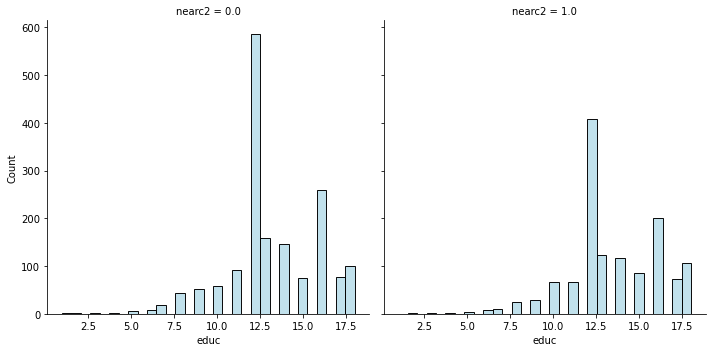

In [5]:
sns.displot(card, x="educ", col="nearc2", color='lightblue') 

Text(8.557222222222222, 0.5, 'Frecuencia')

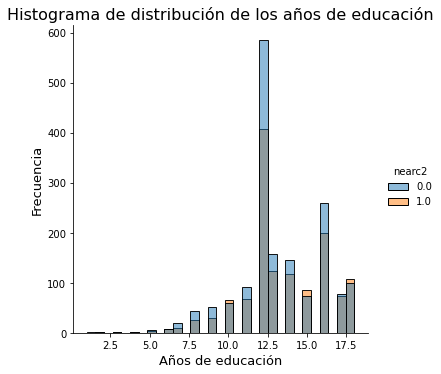

In [7]:
sns.displot(card, x="educ", hue="nearc2")  
plt.title("Histograma de distribución de los años de educación", fontsize=16)
plt.xlabel("Años de educación", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)

Interpretación: De los histogramas observados, se puede evidenciar que la proximidad de un college está correlacionado con el aumento de años de educación, es decir, la presencia de un college aumenta la probabilidad de ir y continuar con los estudios superiores. Mientras que la no presencia de college (nearc2 = 1) no presenta una tan fuerte correlación si la compramos con la situación anterior. Al analizar la tendencia y distribución, podemos decir que mientras haya universidades cerca al lugar de residencia, la probabilidad de estudiar o continuar con estudios superiores aumenta significativamente. Esto puede darse porque al tener un college cerca permite no tener que gaste en trasporte público, en alimentación, alguiler, etc. 

- Grafique dos histogramas para la variable logaritmos de los ingresos lwage para cuando nearc2 == 1, y cuando nearc2 == 0. Compare y describa los patrones que encuentra.

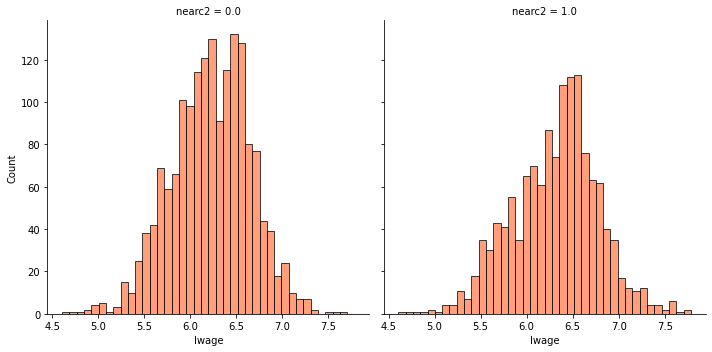

In [8]:
sns.displot(card, x="lwage", col="nearc2", color='coral') 

Interpretacion: A partir de estos histogramas podemos saber si la proximidad de un college tiene efecto o se correlaciona con el logaritmo de ingresos. En ambos casos, cuando hay y no hay un college cerca, presentan una distribución normal que nos señala que existe una distribución simétrica entre los datos. Sin embargo, a pesar de esto, el impacto de la presencia cercana de estas instituciones superiores en los logaritmos de ingreso son más visibles y significativos. A pesar de que en ambos hay un aumento significativo de casos entre los puntos 5.5 a 7.0, el aumento del ingreso es mayor aun mayor cuando hay un college cerca a cuando no hay. Existe una diferencia significativa entre ambos casos y parece ser que la presencia de universidades si tiene un efecto/relación significativa sobre el logaritmo de ingresos.

Text(8.557222222222222, 0.5, 'Frecuencia')

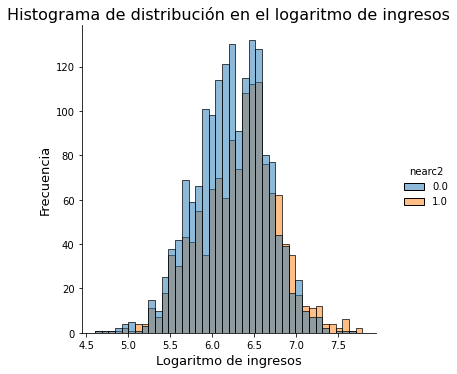

In [9]:
sns.displot(card, x="lwage", hue="nearc2") 
plt.title("Histograma de distribución en el logaritmo de ingresos", fontsize=16)
plt.xlabel("Logaritmo de ingresos", fontsize=13)
plt.ylabel("Frecuencia", fontsize=13)


### Regresiones

- Corran una regresion lineal del tipo "lwage ~ educ + exper + black + south + married + smsa", y expliquen los resultados que encuentran.

In [10]:
#OLS
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Fri, 09 Dec 2022   Prob (F-statistic):          1.97e-232
Time:                        17:23:05   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretación: En este modelo no está presente ni la varible nearc4 ni nearc2, así que estamos analizando un modelo que busca saber la correlación de otras variables (años de educación[educ], experiencia [exper], si es de raza negra o no[black], si es del sur o no[south], si es casado o no[married] y la variable smsa) sobre el aumento y/o disminución de la variable logaritmo de ingresos (lwage). Todas las variables son significativas ya que su p-value es menor a 0,05, pero el R2 del modelo nos indicia que este modelo explica en un 30.5% la variabilidad del resultado/de la variable dependiente (logaritmos del ingreso), y por ende no es un modelo muy fuerte. Si nos enfocamos en la variable años de educación podemos ver que por cada aumento de los años de educación, aumenta el ingreso de los encuestados en un 7.1%.


In [11]:
#Al haber valores invalidos se rellenan con otros datos (0).
card['married'] = card['married'].fillna(0)

- Corran una regresion de tipo IV(usando el paquete IV2SLS) donde van a instrumentalizar la variable educ con nearc2 .

In [12]:
#IV2SLS
iv_reg = IV2SLS.from_formula("lwage ~  1 + exper + black + south + married + smsa + [educ ~ nearc2]", card).fit()
iv_reg.summary


<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                     -1.3114
Estimator:                    IV-2SLS   Adj. R-squared:                -1.3160
No. Observations:                3010   F-statistic:                    289.62
Date:                Fri, Dec 09 2022   P-value (F-stat)                0.0000
Time:                        17:29:06   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      0.1276     3.1412     0.0406     0.9676     -6.0290      6.2843
black          0.1134     0.1816     0.6244     0.5324     -0.2425      0.4692
exper          0.1515     0.0747     2.0274     0.0426      0.0050      0.2980
married       -0.0151     0.0147    -1.0258     0.3050     -0.0438      0.0137
smsa           0.0201     0.1030     0.1949     0.8455     -0.1819      0.2220
south         -0.0319     0.0692    -0.4603     0.6453     -0.1675      0.1038
educ           0.3618     0.1849     1.9562     0.0504     -0.0007      0.7243
==============================================================================

Endogenous: educ
Instruments: nearc2
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Interpretación: En este modelo se ha instrumentalizado la regresión lineal con las variables años de educación junto con la cercanía de institutos educativos. Podemos observar ahora que no todas las variables son significativas, solo las variables años de experiencia y años de educación (es 0,0504, pero lo tomaremos en cuenta). Por cada año adicional de estudios, los ingresos de los estudiantes aumenta aproximadamente un 36%. Asimismo, por cada año adicional de experiencia laboral, el nivel de ingresos aumentaría en 0.15 unidades logaritimicas. De acuerdo a esto, podemos decir que encontramos un mayor aumento del ingreso en este modelo en comparación con el OSL. El modelo presenta un r ajustado negativo que señala que es neutral frente a la introducción de variable adicionales. Asimismo, el F statistic excede 15, lo cual sugiere que no tenemos un problema de instrumento débil.

- Compare los resultados encontrados usando IV2SLS con la primera regresión. ¿Cambió el coeficiente relacionado a educ , por qué?

Entonces, el cambio de coeficiente de la variable años de educación (educ) está relacionado con la introducción e instrumentalización de la variable si existe un college en el county  (nearc2) presente en el modelo, específicamente el nivel de ingresos de los estudiantes aumenta en un 36% (respecto al 7.1% del modelo anterior). Se confirma entonces que la presencia de universidades o institutos superiores cerca al lugar de residencia si juegan un papel importante en la continuación de los estudios y por ende en el ingreso.